<a href="https://colab.research.google.com/github/farhannaushad08/Deep-Learning-Journey/blob/main/CNN_03_Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing dataset from kaggle**

In [1]:
import os
import zipfile

os.makedirs("/root/.kaggle", exist_ok=True)

!mv kaggle.json /root/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 68% 149M/218M [00:00<00:00, 1.56GB/s]
100% 218M/218M [00:00<00:00, 945MB/s] 


**Extract zip file**

In [3]:
import zipfile
with zipfile.ZipFile("cat-and-dog.zip", "r") as zip_ref:
    zip_ref.extractall("cat_and_dog_data")

**Importing essential library**

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras import layers

**Load the data using generator**

In [5]:
train_dir = "/content/cat_and_dog_data/training_set/training_set"
test_dir = "/content/cat_and_dog_data/test_set/test_set"

# Load training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),   # resize images
    batch_size=32,
    label_mode="binary"      # 0 = cat, 1 = dog
)

# Load test set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


AS we can see data is imbalanced so it will have biases on majority class , to handle this we can use upsampling or data augumentation for minority class.

**Normalize the the data between 0 and 1**

In [6]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

**BASELINE CNN MODEL**

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))   # helps prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # binary classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Training cnn model on train set**

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.5422 - loss: 0.7178 - val_accuracy: 0.6678 - val_loss: 0.6349
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6702 - loss: 0.6170 - val_accuracy: 0.7321 - val_loss: 0.5721
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7234 - loss: 0.5462 - val_accuracy: 0.7667 - val_loss: 0.5159
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7747 - loss: 0.4713 - val_accuracy: 0.7667 - val_loss: 0.4914
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.8115 - loss: 0.4151 - val_accuracy: 0.7652 - val_loss: 0.5015
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8277 - loss: 0.3788 - val_accuracy: 0.7790 - val_loss: 0.4942
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.8693 - loss: 0.3009 - val_accuracy: 0.7820 - val_loss: 0.4994
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8974 - loss: 0.2441 - va

**Evaluate**

In [11]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7821 - loss: 0.7328
Test Accuracy: 79.39%


**Plotting model perfromance**

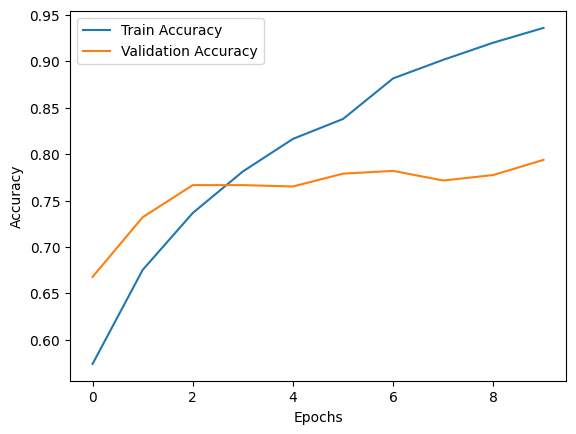

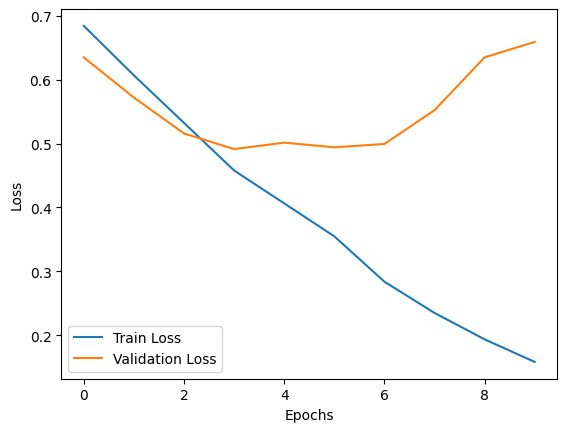

In [12]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


As you can see model overfit, it will give more accuracy on train set but doest improve on test set.

To reduce overfitting we can do:-

*   Add More Data

*   Data Augumentation

*   L1/L2 Regularizer
*   Dropout


*   Batch Normalization


*   Reduce Complexity



## **Trying another cnn architecture for better result using 4 Convolutional layers with increasing filters**








Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5424 - loss: 0.6852 - val_accuracy: 0.5922 - val_loss: 0.6563
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6725 - loss: 0.6049 - val_accuracy: 0.7108 - val_loss: 0.5669
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7171 - loss: 0.5495 - val_accuracy: 0.7504 - val_loss: 0.5123
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.7573 - loss: 0.5030 - val_accuracy: 0.7306 - val_loss: 0.5317
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7864 - loss: 0.4639 - val_accuracy: 0.7805 - val_loss: 0.4689
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8093 - loss: 0.4227 - val_accuracy: 0.7810 - val_loss: 0.4535
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8343 - loss: 0.3781 - val_accuracy: 0.8122 - val_loss: 0.4368
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8448 - loss: 0.3590 - val_accuracy:

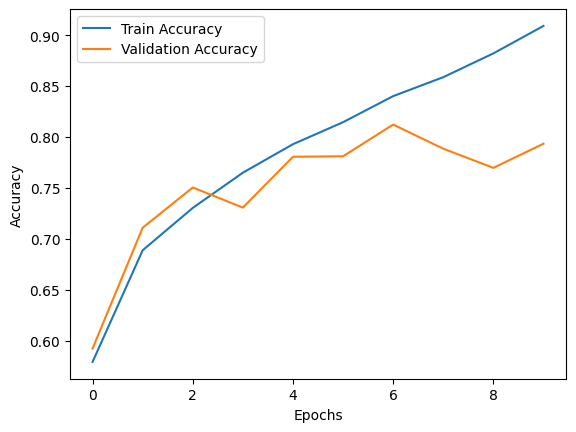

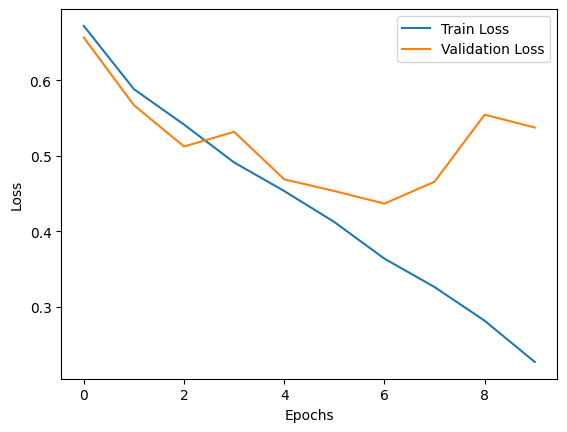

In [14]:

model = Sequential()


model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(20, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(40, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # binary classification

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

# Evaluate
loss, acc = model.evaluate(test_ds)
print(f"🔥 Test Accuracy: {acc*100:.2f}%")

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Here you can see there is less overfitting compare to upper cnn model , Trying more epochs will better result as compared to previous cnn model.

**Trying out random cat or dog sample for prediction.**

*   0-Cat
*   1-Dog



In [15]:
import cv2

In [16]:
test_img=cv2.imread('/content/cat_and_dog_data/test_set/test_set/dogs/dog.4001.jpg')

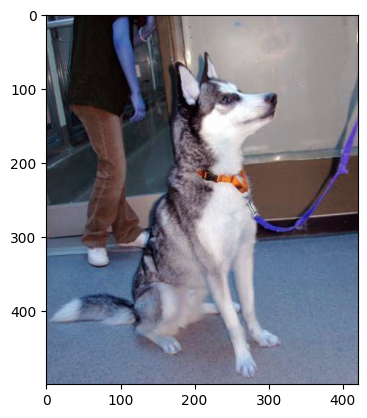

In [17]:
plt.imshow(test_img)

In [21]:
test_img.shape

(499, 421, 3)

In [22]:
test_img=cv2.resize(test_img,(150,150))

In [23]:
test_img.shape

(150, 150, 3)

In [24]:
test_input=test_img.reshape(1,150,150,3)

In [25]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


array([[0.]], dtype=float32)

In [28]:
test1_img=cv2.imread('/content/cat_and_dog_data/test_set/test_set/cats/cat.4001.jpg')

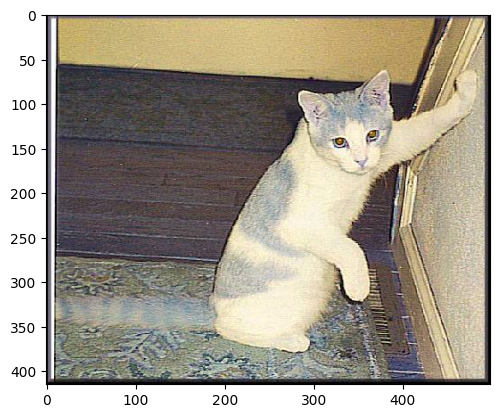

In [29]:
plt.imshow(test1_img)

In [30]:
test1_img.shape

(415, 498, 3)

In [31]:
test1_img=cv2.resize(test_img,(150,150))

In [32]:
test1_img.shape

(150, 150, 3)

In [33]:
test_input=test_img.reshape(1,150,150,3)

In [34]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.]], dtype=float32)